print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))# **Convolutional Neural Networks**


What we will learn today
*   What does it mean to convolve two functions
*   How convolution operations work in discrete and in continious spaces
*   How convolutional layers can be used in your neural network architecture


Convolutional Neural netwrosk are commonly used when working with image like data to extract features in the image.


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2023-11-09 14:20:16.414426: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  1


2023-11-09 14:20:17.903032: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-09 14:20:17.930103: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-09 14:20:17.930297: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## **How do we feed images into Neural Networks**

In the previous workshops we were feeding one dimensional lists into our network. Specfically for every element in the input vector we created 1 input neuron. For a vector of $n$ input variables we had $n$ input neurons:


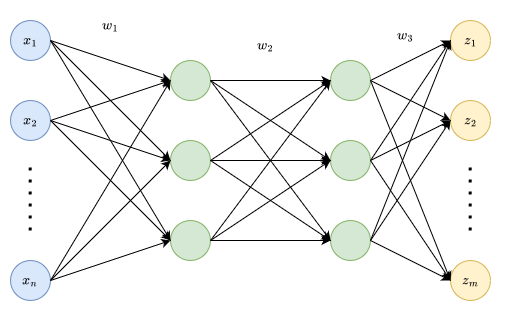

Images can be represented as matricies. The matrix act as bit maps, where element at index $i, j$ represents the brightness of the cooresponding pixel. In the case of grey scale images (black and white) the matrix is 2 dimensional, in the case of colour rgb images the matrix is a 3 dimensional tensor, with one dimension having a size of 3 (red, green, and blue brightness) and the other two dimensions correspond to the width and height of the image.

### **Flattening images**

one way to transform a 2 dimensional matrix into a vector is by stacking rows one after another. In this manner a matrix with $n$ rows and $m$ columns can be represented as a e one dimensional vector of $n\times m$ elements:

![flattening.drawio.png]()

While we could simply flatten out images into vectors and then feed them into fully connected dense layers, this brings with it several challenges:

*   for large colour images the flattend image can be very large,
*   learned behaviour is not shared spatially across the image.

The second point is actually quite important. Consider the case where the network has to learn to differentiate between circles and lines in images in order to classify them. The network could learn that specfic sets of neurons firing in combination mean that the contents of the image is a circle rather than a line. However the same input pixels will always map to the same input neurons. The network could well learn to detect circles in the upper left corner of the image. But, in order to detect circles else where in the image the network will have to again learn that specfic combinations of pixel intensities means a circle and not a line. Convolutional layers solve this issue and also help to reduce the number of parameters in the neural network.


## **Applying Kernels (convolution operation) to images**



A kernel is a small grid (matrix) of values that we slide over our image to produce another image. On every step the we multipy the kernel with the corresponding pixel and then sum to produce a single value. By sliding the kernel over all pixels in the image in this manner we produce another image that has been modified (or filtered) using the kernel.


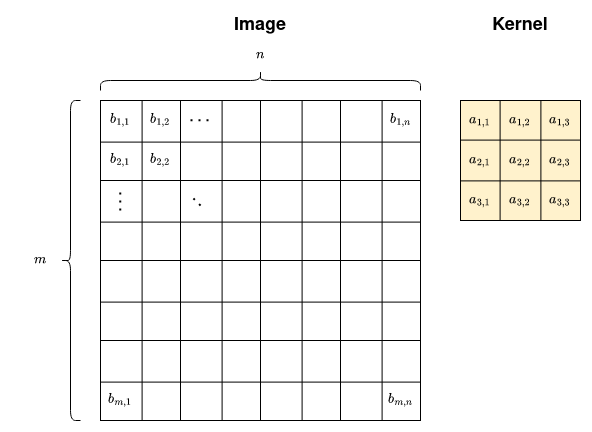

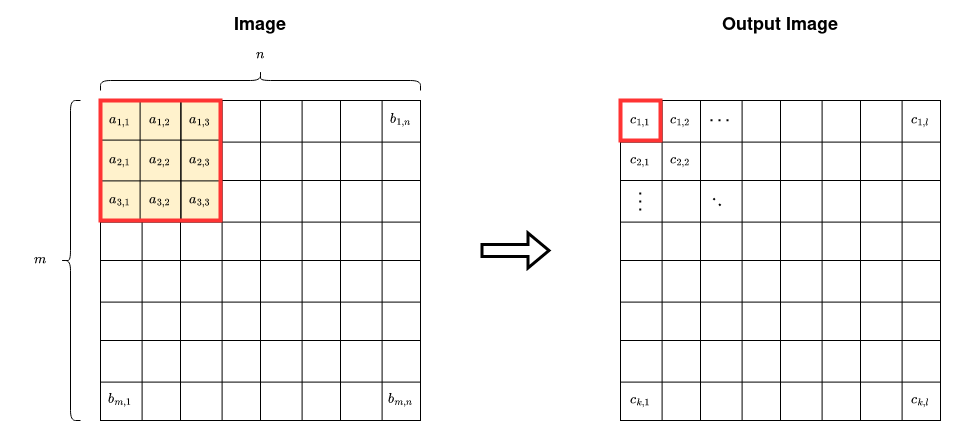
---

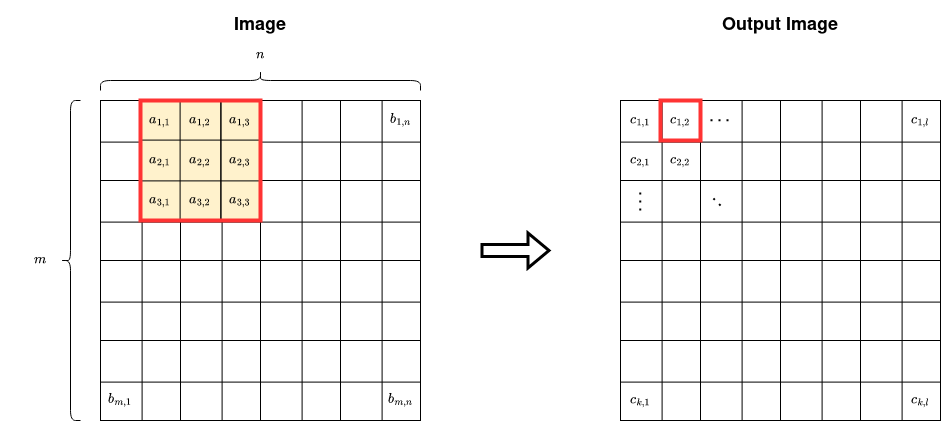
---

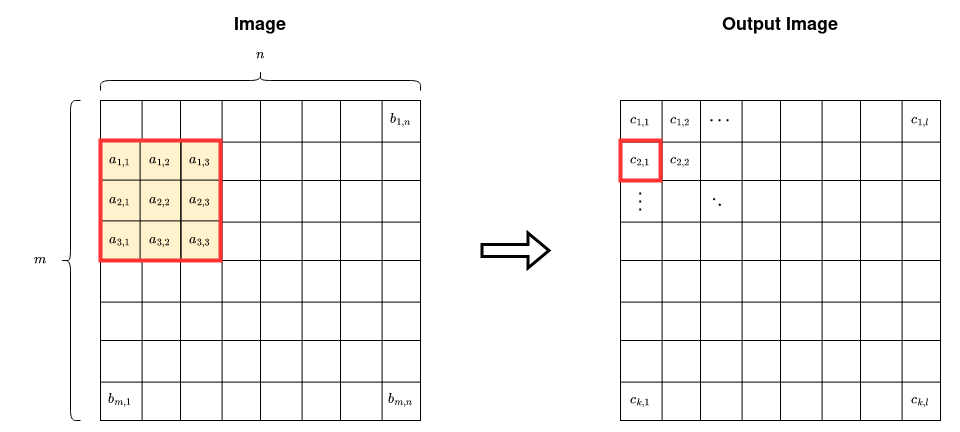

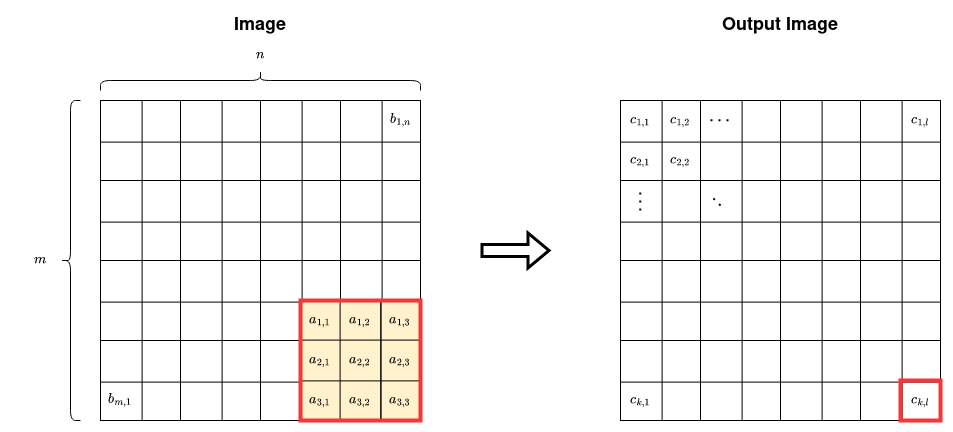

### **Kernel Mathematics**


For a square kernel with $p$ rows and columns, applied to an image of $n$ width and $m$ height, any pixel located at output coordinates $i, j$ can be found from:

$c_{y,x} = (\sum\limits_i^m \sum\limits_j^n a_{y+i, x+j} b_{i,j}) + d$

where $a_{y, x}$ is the value of the pixel located in the $x$'th column of the $y$'th row. $b_{i,j}$ is the kernel element located in the $i$'th row of the $j$'th column, d is the bias assossiated with the kernel
The width of the output image will be: $l = n - p$ and the height of the output image will be $k=n-p$


In [ ]:
import numpy as np

def apply_kernel(kernel, sub_image):
  c = 0
  for i in range(kernel.shape[0]):
    for j in range(kernel.shape[1]):
      c += kernel[i,j] * sub_image[i, j]
  return c


In [ ]:
def convolve(kernel, bias, im):
  # kernel size
  p = kernel.shape[0] # kernel shape

  # initalise output image
  output_shape = (im.shape[0]-p, im.shape[1]-p)
  output_im = np.zeros(output_shape, dtype =np.int8)

  #iterate over pixels in the output image
  for i in range(output_shape[0]):
    for j in range(output_shape[1]):
      output_im[i,j] = apply_kernel(kernel, im[i:i+p, j:j+p]) + bias

  return output_im


[[-128 -128 -128 ... -128 -128 -128]
 [-128 -128 -128 ... -128 -128 -128]
 [-128 -128 -128 ... -128 -128 -128]
 ...
 [-128 -128 -128 ... -128 -128 -128]
 [-128 -128 -128 ... -128 -128 -128]
 [-128 -128 -128 ... -128 -128 -128]]
Image shape: (28, 28)


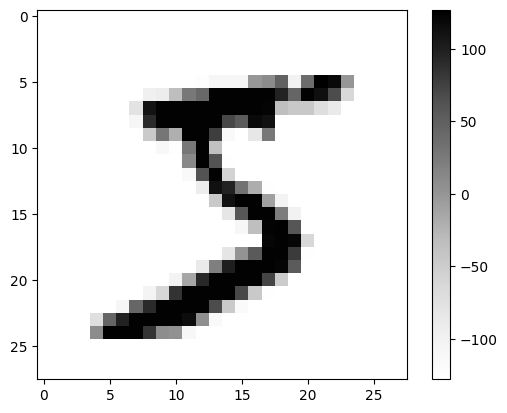

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

np.set_printoptions(threshold=10)

# load the mnist dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
im = x_train[0]

#convert to int8
im = np.empty(x_train[0].shape, dtype = np.int8)
im[:, :] = x_train[0] - 128


plt.imshow(im, cmap="Greys")
plt.colorbar()

print(im)
print("Image shape: {}".format(im.shape))

Image shape: (25, 25)


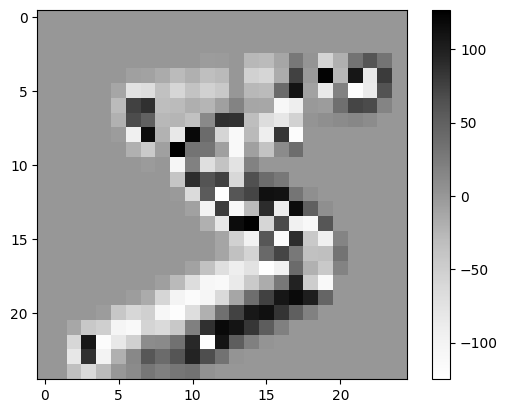

In [ ]:
# setting up the kernel
kernel = np.array([[0.25, 0, - 0.25], [0.5, 0, -0.5], [0.25, 0, -0.25]])

# apply kernel to image
output_im = convolve(kernel, im)
#print and show output
plt.imshow(output_im, cmap="Greys")
plt.colorbar()
print("Image shape: {}".format(output_im.shape))

### **What does the Kernel do**



By choosing specfic kernal values we can detect specfic features in images. For example the image used above was detecting vertical lines consider the following image

In [ ]:
# URL for images
# [trees]       https://pixabay.com/photos/trees-tree-trunks-forest-nature-8173531/
# [paper stack] https://pixabay.com/photos/files-paper-office-paperwork-stack-1614223/

#download image
!wget https://pixabay.com/get/g86aca010933f10dab835a36c1ced9646308381040a4bf829cc74e9afc0f1b51fda179201aa8f759ed307c740415536f1c732daa92855890c2ee3ad672e81cc187d1eb0643a402979ee63f7d176aee009_1920.jpg?attachment=
!wget https://pixabay.com/get/g403f523cc4e43f967e5a3f9fa5233ff6b1305a6880e72519cdfb55f3df9ed85a3fa04ff8da9de00aa4188dad15c299c118c5f540dd7fc177a6790cb1936487a7c5621034fe3a024c6801c9ab68234992_1280.jpg?attachment=
# image path
image_path_tree = "trees-8173531_1920.jpg"#"/content/g86aca010933f10dab835a36c1ced9646308381040a4bf829cc74e9afc0f1b51fda179201aa8f759ed307c740415536f1c732daa92855890c2ee3ad672e81cc187d1eb0643a402979ee63f7d176aee009_1920.jpg?attachment="
image_path_paper = "/content/g403f523cc4e43f967e5a3f9fa5233ff6b1305a6880e72519cdfb55f3df9ed85a3fa04ff8da9de00aa4188dad15c299c118c5f540dd7fc177a6790cb1936487a7c5621034fe3a024c6801c9ab68234992_1280.jpg?attachment="



/bin/bash: wget: command not found
/bin/bash: wget: command not found


(1280, 1920)
[[198 191 197 ... 149 148 144]
 [209 212 188 ... 143 147 152]
 [206 205 194 ... 144 147 151]
 ...
 [ 50  33  41 ...  20  24  26]
 [ 35  33   8 ...  21  26  24]
 [ 32  22  23 ...  21  24  19]]


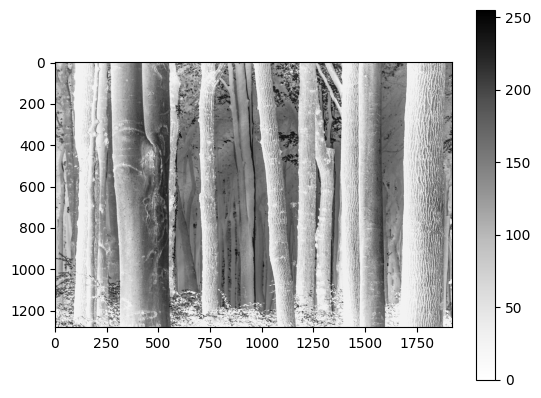

In [ ]:
# load into variable image
im_uint8 = plt.imread(image_path_tree)[:,:, 0] # selecting just the first r band from rgb
print(im_uint8.shape)

im = np.empty(im_uint8.shape, dtype = np.int8)
im[:, :] = im_uint8 - 128

print(im_uint8)

plt.imshow(im_uint8, cmap="Greys")
plt.colorbar()

Image shape: [[ 13  12  76 ...   9   7  -1]
 [ 10  -1  48 ...  10   7   0]
 [  5  -1  17 ...   3   1   3]
 ...
 [-11   6 -17 ...  -2  -5   3]
 [-39 -26  -8 ...  -1   0   2]
 [-11 -48 -53 ...  -2   2   1]]
This kernel picks up vertical lines.


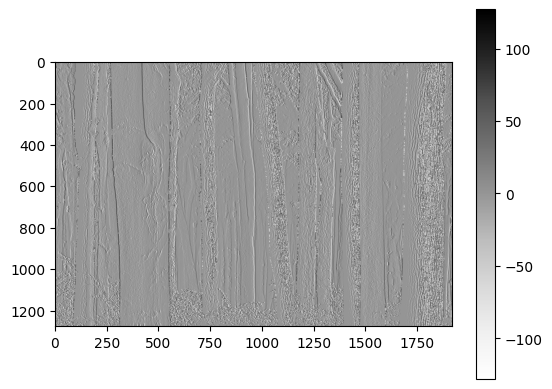

In [ ]:
# setting up the kernel
kernel = np.array([[0.25, 0, - 0.25], [0.5, 0, -0.5], [0.25, 0, -0.25]])
bias = 0

# apply kernel to image
output_im = convolve(kernel, bias, im)

#print and show output
plt.imshow(output_im, cmap="Greys")
plt.colorbar()
print("Image shape: {}".format(output_im))
print("This kernel picks up vertical lines.")

Image shape: [[ -8 -16 -38 ...  -3   1   3]
 [ 11   1 -19 ...   0  -4  -5]
 [  7  13   3 ...   5  -2  -4]
 ...
 [ -6 -33 -12 ...   0   4   6]
 [ 79  44   0 ...  -1   0   2]
 [ 36  77  55 ...  -1  -3  -2]]
This kernel picks up horizontal lines.


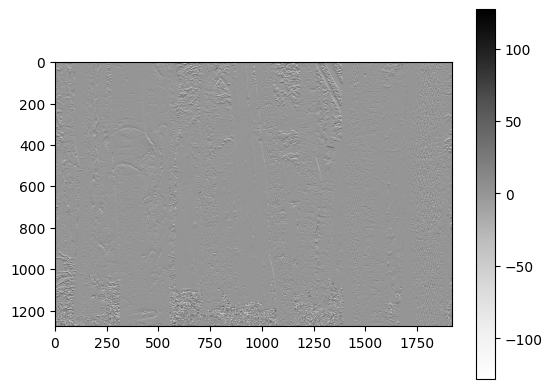

In [ ]:
# rotating the kernel by 90 degrees
kernel = np.array([[0.25, 0.5, 0.25], [0, 0, 0], [-0.25, -0.5, -0.25]])
bias = 0

# apply kernel to image
output_im = convolve(kernel, bias, im)

#print and show output
plt.imshow(output_im, cmap="Greys")
plt.colorbar()
print("Image shape: {}".format(output_im))
print("This kernel picks up horizontal lines.")

This kernel picks up edges


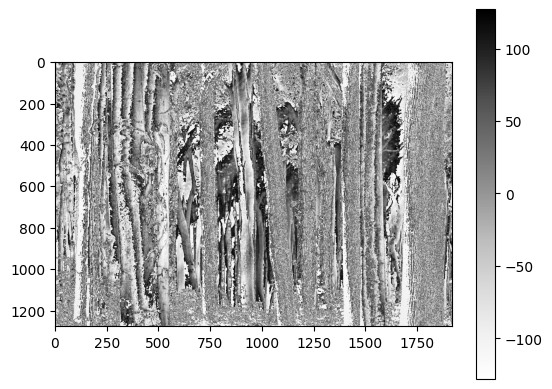

In [ ]:
# rotating the kernel by 90 degrees
kernel = np.array([[0, -1, 0], [-1, 0, -1], [0, -1, 0]])
bias = 0

# apply kernel to image
output_im = convolve(kernel, bias, im)

#print and show output
plt.imshow(output_im, cmap="Greys")
plt.colorbar()
print("This kernel picks up edges")

[[-0.71925384 -0.58341459 -0.32504963]
 [-0.56023451 -0.90224607 -0.59097228]
 [-0.27617949 -0.51688389 -0.69858995]]
This kernel picks up edges


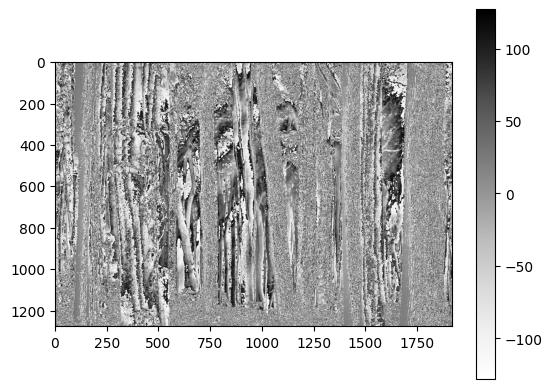

In [ ]:
# rotating the kernel by 90 degrees
kernel = np.random.normal(size=(3, 3))
bias = 0
print(kernel)

# apply kernel to image
output_im = convolve(kernel, bias, im)

#print and show output
plt.imshow(output_im, cmap="Greys")
plt.colorbar()
print("This kernel picks up edges")

### **How do we choose Kernel values**


The output of a convolutional layer is an image. The final output of the network is often required to be a vector, e.g. probabilities assossiated with different possible classes that could be depicted in the images. To convert the image output by a convolutional layer into a vector we flatten it using the operation described above.




To find the kernel values that are required to best approximate the desired function we can again use the gradient of the loss with respect to the kernel values. The convolution operation is differentiable:

$c_{y,x} = \sum\limits_i^m \sum\limits_j^n a_{y+i, x+j} b_{i,j} +e$

$\frac{dc_{y,x}}{d_{b_{i, j}}} = a_{y+i, x+j}$

$\frac{de_{y,x}}{d_{b_{i, j}}} = 1$

i.e. for every output pixel we can create a partial derivative with respect to every kernel element. So to find kernel values that we reuqire we simply initalise them randomly before training and then use the gradient with respect to the loss to push each kernel value up or down so as to minimise the loss. In essence we train convolutional layers in the same way as dense fully-connected layers.

### **Channels**


Images can contain fastly different features that require different kernels to pick up. If we apply only one kernel then it will have to be the kernel that on average picks up the most features. However, we can apply multiple kernels to the same image in different "**Channels**". Every convolutional layer can have multiple kernels assossiated with it. The different kernels are all applied to the same input to generate multiple different output channels. If a one channel (black and white image) square image, with width $w$, is fed through a convolutional layer with 4 kernels each of size 3x3, then the output of the layer will be in effect 4 square images with width $w-3$. At this stage it makes more sense to drop the notion of iamges and to only think of tensors (multi-dimensional matricies). We feed a tensor with dimensions $(w, w, n)$ through a 3x3 convolutional layer with m filters and obtain an output tensor with shape $(w-3, w-3, m)$, using n*m kernels. Note, Tensorflow uses a channels last convention, so the last number indicates the number of channels.


It should be noted that for multi-channel inputs one kernel is created per input channel. Each kernel is applied to one input channel and the sum is taken accross the outputs of the kernels. Since the output of a convolution layer is another image we can chain convolutional layers one after another.

Example on the dimensions. A network is comprised of two convolutional layers, and takes as black and white images (single channel) of size 28 by 28 pixels. The first convolutional layer has 4 filters and a kernel size of $(3x3)$. The second convolutional layer has 2 filters and a kenel size of (3x3). The first convolutional layer will have 4 kernels 4x1 = 4, and will output a tensor of dimensions (25, 25, 4). The second convolutional layer will have 8 kernels 2x4 = 8, and will output a tensor of dimensions (22, 22, 2)


In [ ]:
n_filters_1 = 4
n_filters_2 = 2

np.random.seed(2)

kernel_1 = np.random.normal(size=(3, 3, n_filters_1)               , scale=0.1)
bias_1 = np.zeros((n_filters_1))

kernel_2 = np.random.normal(size=(3, 3, n_filters_1 * n_filters_2) , scale=0.1)
bias_2 = np.zeros((n_filters_1 * n_filters_2))

output_1 = np.empty((im.shape[0]-3      , im.shape[1]-3       , n_filters_1))
output_2 = np.empty((output_1.shape[0]-3, output_1.shape[1]-3 , n_filters_2))

print("output 1 shape :{}".format(output_1.shape))
print("output 2 shape :{}".format(output_2.shape))

#first convolution operation
for i in range(kernel_1.shape[-1]): # 4 loops
  output_1[:, :, i] = convolve(kernel_1[:, :, i], bias_1[i], im)

for i in range(n_filters_2): # 2 loops
  for j in range(n_filters_1): #4 loops
    output_2[:, :, i] += convolve(kernel_2[:, :, i*n_filters_1+j], bias_2[i*n_filters_1+j], output_1[:, :, j])



output 1 shape :(1277, 1917, 4)
output 2 shape :(1274, 1914, 2)


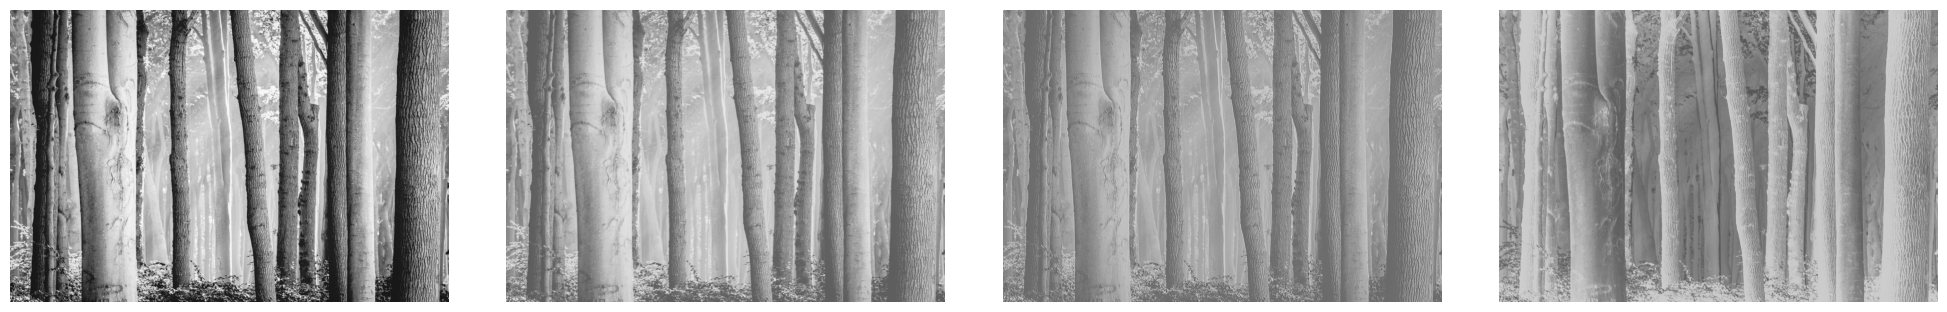

In [ ]:
fig1, axs1 = plt.subplots(1, output_1.shape[-1], figsize = (20, output_1.shape[-1]*16))
fig1.tight_layout()
for i in range(output_1.shape[-1]):
  axs1[i].imshow(output_1[:, :, i], cmap="Greys")
  axs1[i].axis('off')

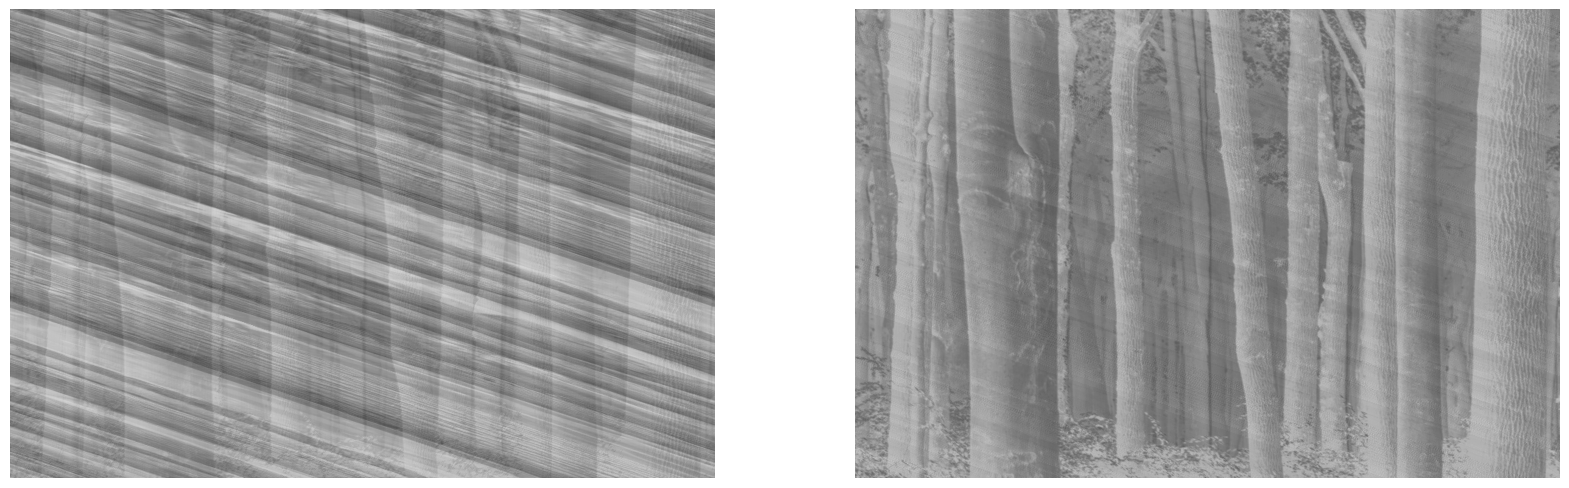

In [ ]:
fig2, axs2 = plt.subplots(1, output_2.shape[-1], figsize = (20, output_2.shape[-1]*16))

for i in range(output_2.shape[-1]):
  axs2[i].imshow(output_2[:, :, i], cmap="Greys")
  axs2[i].axis('off')



### **Paddinge**

At this stage we know what a convolution operation is and how we can find kernel values that allow us to best approximate our function. A small detail that we have not talked about is that the kernel is not fully applied at the edges of the images. Specfically the right side of the kernel is never applied along the left edge of the image. Similarly with the top, left, and bottom of the kernel and the bottom, left, and top of the image.

To get around this issue we can "pad" the image. Padding the image simply means to add black (0) pixels around the edge of the image so tha the kernel can be applied:



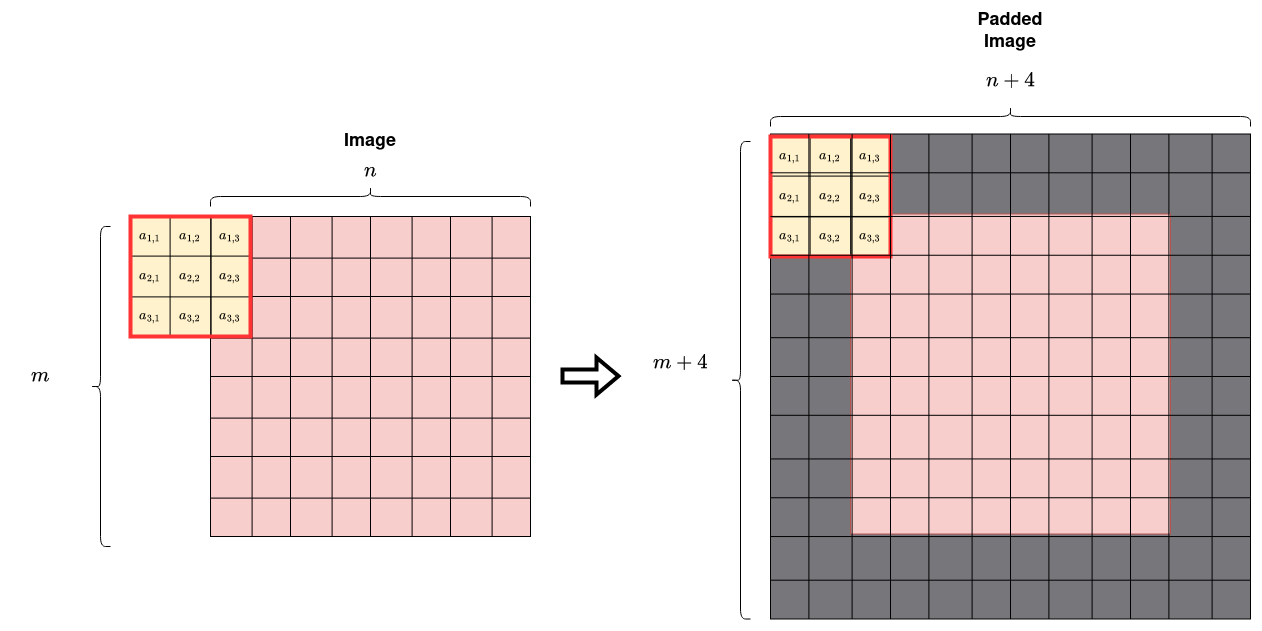

This changes the size of the output tensor. if padding of $p$ is applied to a square image of size $n$, with a kernel of size $k$ then the output will be a square image of size $n+2p-k$. Note, the padding value is the amount to add to each side, so in the case above the padding was 2.

## **Tensorflow Example: MNIST fashion dataset**

We will now compare the performance of a convolutional neural network against a network made up of only fully-connected layers on the mnist fashion dataset. This dataset is has 28 pixel by 28 pixel images of 10 different categories. The dataset contains 60000 training images, and 10000 testing images.

| id      | Object |
| ----------- | ----------- |
| 0   | T-shirt        |
| 1   | Trousers       |
| 2   | Pullover       |
| 3   | Dress        |
| 4   | Coat      |
| 5   | Sandal        |
| 6   | Shirt       |
| 7   | Sneaker       |
| 8   | Bag        |
| 9   | Ankle boot       |




Text(0.5, 1.0, 'T-shirt')

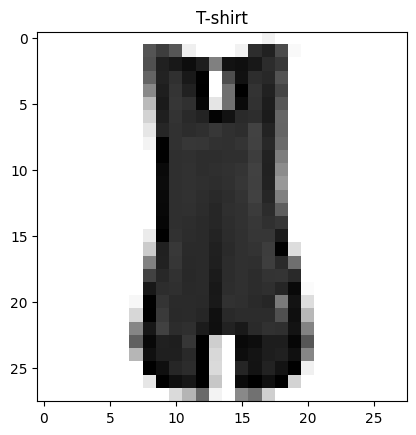

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# load the mnist dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

label_map = {0 : "T-shirt", 1 : "Trousers", 2 : "Pullover", 3 : "Dress", 4 : "Coat", 5 : "Sandal", 6 : "Shirt", 7 : "Sneaker", 8 : "Bag", 9 : "Ankle boot",}

# one hot encode the data
y_train_onehot = np.zeros((y_train.shape[0], 10))
for i in range(y_train.shape[0]):
  y_train_onehot[i, y_train[i]] = 1

y_test_onehot = np.zeros((y_test.shape[0], 10))
for i in range(y_test.shape[0]):
  y_test_onehot[i, y_test[i]] = 1

idx = 4
plt.imshow(x_train[idx], cmap="Greys")
plt.title(label_map[y_train[idx]])

### **Dense model for MNIST fashion dataset**

In [ ]:
from tensorflow import keras
dense_model = keras.Sequential([keras.Input(x_train[0].shape),
                               keras.layers.Flatten(),
                               keras.layers.Dense(64, activation="relu"),
                               keras.layers.Dense(64, activation="relu"),
                               keras.layers.Dense(10, activation="softmax") # 1 neuron per possible digit, e.g. 0-9
                               ])
# set up
loss_func = keras.losses.CategoricalCrossentropy()
optiimizer=keras.optimizers.Adam()
dense_model.compile(loss=loss_func, optimizer=optiimizer, metrics=['accuracy'])#initalises the weights and biases of the model
dense_model.summary()


# Train
dense_model.fit(x=x_train, y=y_train_onehot, epochs=20, batch_size=256,validation_split=0.1)

# test
predictions = dense_model(x_test)

loss_dense = loss_func(y_test_onehot, predictions)
print(loss_dense)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
211/211 [==============================] - 1s 3ms/step - loss: 6.2984 - accuracy: 0.6849 - val_loss: 1.6656 - val_accuracy: 0.7473
Epoch 

### **Convolutional model for MNIST fashion dataset**

In [ ]:
from tensorflow import keras
conv_model = keras.Sequential([keras.Input((28, 28, 1)),
                               keras.layers.Conv2D(filters = 32, kernel_size=3, activation="relu"),
                               keras.layers.Conv2D(filters = 64, kernel_size=3, activation="relu"),

                               keras.layers.Flatten(),
                               keras.layers.Dense(64, activation="relu"),
                               keras.layers.Dense(64, activation="relu"),
                               keras.layers.Dense(10, activation="softmax")
                               ])
# set up
loss_func = keras.losses.CategoricalCrossentropy()
optiimizer=keras.optimizers.Adam()
conv_model.compile(loss=loss_func, optimizer=optiimizer, metrics=['accuracy'])
conv_model.summary()

# Train
conv_model.fit(x=x_train, y=y_train_onehot, epochs=20, batch_size=256,validation_split=0.1)

# test
predictions = conv_model(x_test)

loss_conv = loss_func(y_test_onehot, predictions)
print(loss_conv)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten_3 (Flatten)         (None, 36864)             0         
                                                                 
 dense_9 (Dense)             (None, 64)                2359360   
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 2382986 (9.09 MB)
Trainable params: 2382

In [ ]:
from keras import backend as K
print("Dense loss:                                   {:.5f}, number of params: {}".format(loss_dense, int(np.sum([K.count_params(p) for p in dense_model.trainable_weights]))))
print("Convolution loss:                             {:.5f}, number of params: {}".format(loss_conv, int(np.sum([K.count_params(p) for p in conv_model.trainable_weights]))))

Dense loss:                                   1.79612, number of params: 1707274
Convolution loss:                             0.71664, number of params: 1933130


### **MaxPool operation**

MaxPool layers are layers often used in combination with convolutional neural networks. A maxpool layer is effectively reduces the size of an input tensor by splitting the tensor into grid and replacing the grid with only the maximum value found within the grid:

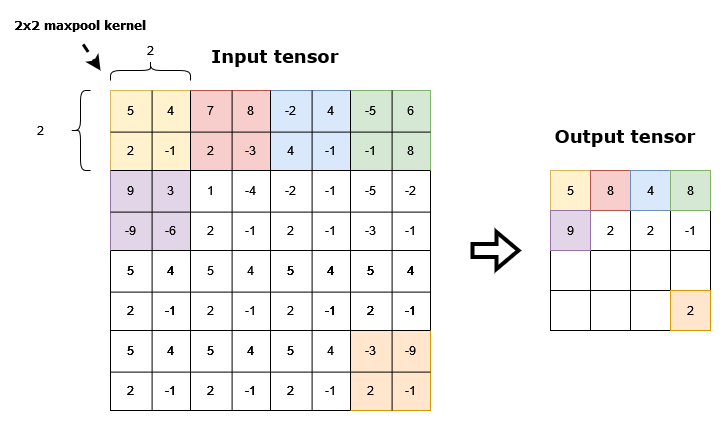

In practice this has the effect of reducing the size of the input tensor across width and height dimensions. The channel dimension is usually left intact. MaxPool operations reduce the size of the tensor reducing the computational requirements in the next layer and adds translation invariance, by reducing the image to only the most important values from within each neighborhood.


Othertypes of pooling operations also exist such as minimum pooling, average pooling,

In [ ]:
from tensorflow import keras
conv_model2 = keras.Sequential([keras.Input((28, 28, 1)),
                               keras.layers.Conv2D(filters = 32, kernel_size=3, activation="relu"),
                               keras.layers.MaxPooling2D(pool_size=(2,2)),
                               keras.layers.Conv2D(filters = 64, kernel_size=3, activation="relu"),
                               keras.layers.MaxPooling2D(pool_size=(2,2)),

                               keras.layers.Flatten(),
                               keras.layers.Dense(64, activation="relu"),
                               keras.layers.Dense(64, activation="relu"),
                               keras.layers.Dense(10, activation="softmax")
                               ])
# set up
loss_func = keras.losses.CategoricalCrossentropy()
optiimizer=keras.optimizers.Adam()
conv_model2.compile(loss=loss_func, optimizer=optiimizer, metrics=['accuracy'])
conv_model2.summary()


# Train
conv_model2.fit(x=x_train, y=y_train_onehot, epochs=20, batch_size=256,validation_split=0.1)

# test
predictions = conv_model2(x_test)

loss_conv2 = loss_func(y_test_onehot, predictions)
print(loss_conv2)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 1600)              0         
                                                                 
 dense_46 (Dense)            (None, 64)              

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_13" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 32, 32, 3)


In [ ]:
print("Dense loss:                                   {:.5f}, number of params: {}".format(loss_dense, int(np.sum([K.count_params(p) for p in dense_model.trainable_weights]))))
print("Convolution loss:                             {:.5f}, number of params: {}".format(loss_conv, int(np.sum([K.count_params(p) for p in conv_model.trainable_weights]))))
print("Convolution (maxpooling) loss:                {:.5f}, number of params: {}".format(loss_conv2, int(np.sum([K.count_params(p) for p in conv_model2.trainable_weights]))))

### **Overfitting and dropout layers**

Overfitting means that the model is fitting too closely to the dataset and is not sufficiently learning to generalise. In essence the model is "memorising" the inputs and what the output should be for each input, instead of approximating the function from which the dataset is sampled. Overfitting can be easily detected by comparing the training loss against the testing loss or the validation loss. If the training loss is much smaller than the testing or validation loss, then it means that the model is performing well on the dataset but poorly testing or validation data.
Since the testing or validation data should be sampled from the same distribution as the training data, this suggests that the network has not learned to approximate the function and has instead learned ("memorised") what the output should be for each of the input variabes. Analagy: Imagine you are trying to teach a student how to add two numbers. You come up with 10 examples of additions e.g. 5 + 2 = 7, and you ask the student over and over again to tell you what correct sum of each example is. After a while whenever you ask the student what is 5 + 2 he responds with 7. You then ask the student to tell you what the sum of two numbers, not in the example list, is and he does'nt know. Because instead of learning what addition is he instead simply memorised that when you ask for 5 + 2 the answer 7.

There are several ways to deal with overfitting. One popular and effective method are so called dropout layers. A dropout layer is a layer that is only active during training. A dropout layer will for every input into the layer mask(set to 0) the output with a spcified probability. The dropout layer does not have any learnable parameters, and its only purpose is to, with a specfied probability, maskout one the inputs from the previous layer. This means that the model will not be able to relie on any specfic neuron activations in the previous layer, which is common behaviour when overfitting. Consider a Denselayer with 100 neurons that is followed by a dropout layer with a given probability of 0.1. The dense layer will produce 100 outputs. On each forward pass, the dropout layer will sample 100 random numbers and when a random number is less than 0.1, the output of the corresponding neuron will be masked to 0. This means that on average the dropout layer will mask out 10 neurons per forward pass. This behaviour is only active during training, as its purpose is only to prevent the neural network from over fitting.


In [ ]:
from tensorflow import keras
conv_model3 = keras.Sequential([keras.Input((28, 28, 1)),

                               keras.layers.Conv2D(filters = 32, kernel_size=3, activation="relu"),
                               keras.layers.MaxPooling2D(pool_size=(2,2)),
                               keras.layers.Dropout(0.1),

                               keras.layers.Conv2D(filters = 64, kernel_size=3, activation="relu"),
                               keras.layers.MaxPooling2D(pool_size=(2,2)),
                                keras.layers.Dropout(0.1),

                               keras.layers.Flatten(),

                               keras.layers.Dense(64, activation="relu"),
                               keras.layers.Dropout(0.1),

                               keras.layers.Dense(64, activation="relu"),
                               keras.layers.Dropout(0.1),

                               keras.layers.Dense(10, activation="softmax")
                               ])
# set up
loss_func = keras.losses.CategoricalCrossentropy()
optiimizer=keras.optimizers.Adam()
conv_model3.compile(loss=loss_func, optimizer=optiimizer, metrics=['accuracy'])
print(conv_model2.summary())


# Train
conv_model3.fit(x=x_train, y=y_train_onehot, epochs=20, batch_size=256,validation_split=0.1)

# test
predictions = conv_model3(x_test)

loss_conv3 = loss_func(y_test_onehot, predictions)
print(loss_conv3)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 1600)              0         
                                                                 
 dense_46 (Dense)            (None, 64)              

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_14" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 32, 32, 3)


In [ ]:
print("Dense loss:                                   {:.5f}, number of params: {}".format(loss_dense, int(np.sum([K.count_params(p) for p in dense_model.trainable_weights]))))
print("Convolution loss:                             {:.5f}, number of params: {}".format(loss_conv, int(np.sum([K.count_params(p) for p in conv_model.trainable_weights]))))
print("Convolution (maxpooling) loss:                {:.5f}, number of params: {}".format(loss_conv2, int(np.sum([K.count_params(p) for p in conv_model2.trainable_weights]))))
print("Convolution (with maxpooling + dropout) loss: {:.5f}, number of params: {}".format(loss_conv3, int(np.sum([K.count_params(p) for p in conv_model3.trainable_weights]))))

## **Tensorflow Example: CIFAR10 dataset**

### **Training a fully dense model on the CIFAR10 dataset**

Text(0.5, 1.0, 'automobile')

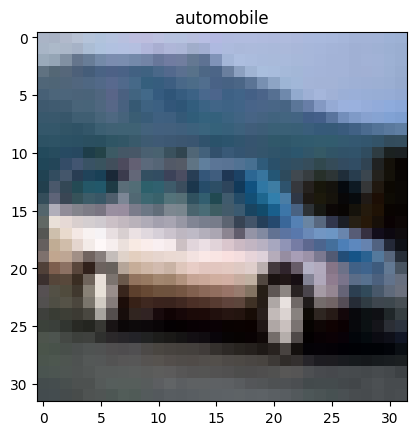

In [ ]:
import tensorflow as tf

# load the mnist dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

label_map = {0 : "airplane", 1 : "automobile", 2 : "bird", 3 : "cat", 4 : "deer", 5 : "dog", 6 : "frog", 7 : "horse", 8 : "ship", 9 : "truck",}

# one hot encode the data
y_train_onehot = np.zeros((y_train.shape[0], 10))
for i in range(y_train.shape[0]):
  y_train_onehot[i, y_train[i]] = 1

y_test_onehot = np.zeros((y_test.shape[0], 10))
for i in range(y_test.shape[0]):
  y_test_onehot[i, y_test[i]] = 1

idx = 4
plt.imshow(x_train[idx])
plt.title(label_map[y_train[idx, 0]])

In [ ]:
from tensorflow import keras
dense_model = keras.Sequential([keras.Input(x_train[0].shape),
                               keras.layers.Flatten(),
                               keras.layers.Dense(512, activation="relu"),
                               keras.layers.Dense(256, activation="relu"),
                               keras.layers.Dense(10, activation="softmax") # 1 neuron per possible digit, e.g. 0-9
                               ])
# set up
loss_func = keras.losses.CategoricalCrossentropy()
optiimizer=keras.optimizers.Adam()
dense_model.compile(loss=loss_func, optimizer=optiimizer, metrics=['accuracy'])#initalises the weights and biases of the model
print(dense_model.summary())


# Train
dense_model.fit(x=x_train, y=y_train_onehot, epochs=40, batch_size=256,validation_split=0.1)

# test
predictions = dense_model(x_test)

loss_dense = loss_func(y_test_onehot, predictions)
print(loss_dense)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 3072)              0         
                                                                 
 dense_52 (Dense)            (None, 512)               1573376   
                                                                 
 dense_53 (Dense)            (None, 256)               131328    
                                                                 
 dense_54 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1707274 (6.51 MB)
Trainable params: 1707274 (6.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/40
176/176 [==============================] - 1s 3ms/step - loss: 121.7578 - accuracy: 0.1847 - val_loss: 17.3692 - val_accuracy: 0.22

### **Training a convolutional model on the CIFAR10 dataset**

In [ ]:
#architecture
conv_model = keras.Sequential([
                                keras.Input(x_train[0].shape),

                                keras.layers.Conv2D(filters = 32, kernel_size=3, activation="relu"), #adding one convolutional layer with 32 kernels of size 3, output uses activation function relu
                                keras.layers.MaxPooling2D(pool_size=(2,2)),
                                keras.layers.Dropout(0.2),

                                keras.layers.Conv2D(filters = 64, kernel_size=3, activation="relu"),
                                keras.layers.MaxPooling2D(pool_size=(2,2)),
                                keras.layers.Dropout(0.2),

                                keras.layers.Conv2D(filters = 128, kernel_size=3, activation="relu"),
                                keras.layers.MaxPooling2D(pool_size=(2,2)),
                                keras.layers.Dropout(0.2),

                                keras.layers.Flatten(),
                                keras.layers.Dense(1024, activation="relu"),
                                keras.layers.Dropout(0.2),

                                keras.layers.Dense(1024, activation="relu"),
                                keras.layers.Dropout(0.2),

                                keras.layers.Dense(256, activation="relu"),
                                keras.layers.Dropout(0.2),

                                keras.layers.Dense(10, activation="softmax")])

# build model
loss_func = keras.losses.CategoricalCrossentropy()
optiimizer=keras.optimizers.Adam()
conv_model.compile(loss=loss_func, optimizer=optiimizer, metrics=['accuracy'])#initalises the weights and biases of the model
print(conv_model.summary())

# train
conv_model.fit(x=x_train, y=y_train_onehot, epochs=40, batch_size=256,validation_split=0.1)

# test
predictions = conv_model(x_test)
loss_conv = loss_func(y_test_onehot, predictions)
print(loss_conv)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_29 (Dropout)        (None, 6, 6, 64)        

2023-11-09 17:40:18.834297: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_16/dropout_28/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


176/176 [==============================] - 3s 6ms/step - loss: 2.9804 - accuracy: 0.1967 - val_loss: 1.8534 - val_accuracy: 0.3382
Epoch 2/40
176/176 [==============================] - 1s 5ms/step - loss: 1.7629 - accuracy: 0.3466 - val_loss: 1.5645 - val_accuracy: 0.4264
Epoch 3/40
176/176 [==============================] - 1s 7ms/step - loss: 1.6054 - accuracy: 0.4130 - val_loss: 1.4680 - val_accuracy: 0.4902
Epoch 4/40
176/176 [==============================] - 1s 5ms/step - loss: 1.5026 - accuracy: 0.4568 - val_loss: 1.3988 - val_accuracy: 0.4906
Epoch 5/40
176/176 [==============================] - 1s 5ms/step - loss: 1.4315 - accuracy: 0.4855 - val_loss: 1.2944 - val_accuracy: 0.5572
Epoch 6/40
176/176 [==============================] - 1s 5ms/step - loss: 1.3709 - accuracy: 0.5111 - val_loss: 1.2279 - val_accuracy: 0.5632
Epoch 7/40
176/176 [==============================] - 1s 5ms/step - loss: 1.3063 - accuracy: 0.5391 - val_loss: 1.1903 - val_accuracy: 0.5930
Epoch 8/40
176/17

### **Large dense model with more parameters**

At this stage you might say "But Luca you have added more learnable parameters to the network, how do we know that its not just the fact that we have more learnable parameters thats causing the nwtowrk to perform better?"

In [ ]:
dense_large_model = keras.Sequential([keras.Input(x_train[0].shape),
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(256, activation="relu"),
                                      keras.layers.Dense(512, activation="relu"),
                                      keras.layers.Dense(1024, activation="relu"),
                                      keras.layers.Dense(512, activation="relu"),
                                      keras.layers.Dense(256, activation="relu"),
                                      keras.layers.Dense(10, activation="softmax") # 1 neuron per possible digit, e.g. 0-9
                                ])

# build model
loss_func = keras.losses.CategoricalCrossentropy()
optiimizer=keras.optimizers.Adam()
dense_large_model.compile(loss=loss_func, optimizer=optiimizer, metrics=['accuracy'])#initalises the weights and biases of the model
dense_large_model.summary()

# train
dense_large_model.fit(x=x_train, y=y_train_onehot, epochs=40, batch_size=256,validation_split=0.1)
# test
predictions = dense_large_model(x_test)
loss_dense_large = (loss_func(y_test_onehot, predictions))
print(loss_dense_large)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 3072)              0         
                                                                 
 dense_59 (Dense)            (None, 256)               786688    
                                                                 
 dense_60 (Dense)            (None, 512)               131584    
                                                                 
 dense_61 (Dense)            (None, 1024)              525312    
                                                                 
 dense_62 (Dense)            (None, 512)               524800    
                                                                 
 dense_63 (Dense)            (None, 256)               131328    
                                                                 
 dense_64 (Dense)            (None, 10)              

In [ ]:
print("Small Dense loss: {:.5f}, number of trainable parameters: {}".format(loss_dense, int(np.sum([K.count_params(p) for p in dense_model.trainable_weights]))))
print("Large Dense loss: {:.5f}, number of trainable parameters: {}".format(loss_dense_large, int(np.sum([K.count_params(p) for p in dense_large_model.trainable_weights]))))
print("Convolution loss: {:.5f}, number of trainable parameters: {}".format(loss_conv, int(np.sum([K.count_params(p) for p in conv_model.trainable_weights]))))

Small Dense loss: 1.73734, number of trainable parameters: 1707274
Large Dense loss: 1.81541, number of trainable parameters: 2102282
Convolution loss: 0.77261, number of trainable parameters: 1933130


## **Useful resources**

3Blue1Brown video on convolutions: https://www.youtube.com/watch?v=KuXjwB4LzSA
Free deep learning book : https://www.deeplearningbook.org/